In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import random as rd
import datetime as dt
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Create dataframe for COVID-19 data
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [ ]:
# Drop SNo column because it is just serial number
# Convert all date columns from string to datetime
data = data.drop(['SNo'],axis=1)
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [ ]:
# Show only first five rows of data
data.head()

In [ ]:
# Retrieve year, month and day for new columns
data['Year'] = data['ObservationDate'].dt.year
data['Month'] = data['ObservationDate'].dt.month
data['Day'] = data['ObservationDate'].dt.day

In [ ]:
# Create dictionary for later assigning of right month and use for plotting (sorted order)
months = {1: '01 Jan', 2: '02 Feb', 3: '03 Mar', 4: '04 Apr', 5: '05 May', 6: '06 Jun', 7: '07 Jul', 8: '08 Aug'
          , 9: '09 Sep', 10: '10 Oct', 11: '11 Nov', 12: '12 Dec'} 

In [ ]:
# Map month to values in dictionary
# Extract number from month column and convert it to integer in new column called MonthNum
data['Month'] = data['Month'].map(months)
data['MonthNum'] = data['Month'].str[:2]
data['MonthNum'] = pd.to_numeric(data['MonthNum'])

In [ ]:
# Show only first five rows of data with the new columns added based on above codes
data.head()

In [ ]:
# Checking how many entries we have and the datatype of columns
data.info()

In [ ]:
# Drop rows with empty or null values
data = data.dropna(axis=0)

In [ ]:
# Drop rows with province/state equals to None or Unknown
indexNames = data[data['Province/State'] == 'None'].index
data = data.drop(indexNames)
indexNames = data[data['Province/State'] == 'Unknown'].index
data = data.drop(indexNames)

In [ ]:
# Checking how many remaining entries for further analysis
data.info()

In [ ]:
data.describe()

In [ ]:
# Show array of remaining countries
data['Country/Region'].unique()

In [ ]:
# Here onwards is all about keeping data consistent
# Using UK for example, which shows the provinces they have
data[data['Country/Region'] == 'UK']['Province/State'].unique()

In [ ]:
# Plot bar chart, notice UK and United Kingdom have their own count when they can be merged together
plt.figure(figsize=(30,5))
plt.title('Confirmed cases in United Kingdom')
sns.barplot(y='Confirmed',x='Province/State',data=data[data['Country/Region'] == 'UK'])

In [ ]:
# There are two entries with UK as Province/State
# We can either merge these two entries into the one with 'United Kingdom' or put the remaining entries into 'UK'
data[data['Province/State'] == 'UK'].head()

In [ ]:
# I chose to do some replacement of values on the entries with Province/State as United Kingdom as 'UK'
data['Province/State'].mask(data['Province/State'] == 'United Kingdom', 'UK', inplace=True)

In [ ]:
# Plot the bar chart and you will notice that we only have one Province/State called 'UK'
# Looking more consistent
plt.figure(figsize=(30,5))
plt.title('Confirmed cases in United Kingdom')
sns.barplot(y='Confirmed',x='Province/State',data=data[data['Country/Region'] == 'UK'])

In [ ]:
# Checking back at dataframe for any correlation on columns
data.corr()

In [ ]:
# Plot regression plot to look at columns 'Confirmed' and 'Deaths' because of how similar/correlated these two columns are
# As the number of confirmed cases increase, the number of deaths from COVID-19 will be higher
# In other words, when we conduct more tests for COVID-19 found in people, the number of confirmed cases and deaths will increase
# The number of confirmed cases is directly proportional to number of deaths
sns.regplot(x='Confirmed', y='Deaths', data=data)

In [ ]:
# This is the line plot where we check Month and Deaths
# As the month goes by, the number of deaths have increase drastically
# This could be that more awareness of COVID-19 have led to people realising to account people who died from the disease
# Another explanation is between March and May, more people who have been earlier confirmed to carry COVID-19 have succumbed to this coronavirus
sns.set(style="whitegrid")
plt.title('Month vs Deaths')
sns.lineplot(x="Month",y="Deaths",data=data)

In [ ]:
# Duplicate copy of original COVID-19 data
# I am creating a copy to make a dummy representation of what will happen in the next 3 months
# Continue from this cell to find out what I am trying to do
data1 = data.copy()

In [ ]:
# Show only first five rows of data
data1.head()

In [ ]:
# Create a variable to store list of countries
# We will only be using countries excluding Others because Others refer to people on board the infected cruise ship(s) and majority of world population would not be travelling out on vacations at this point of time
countries = list(data[data['Country/Region'] != 'Others']['Country/Region'].unique())

In [ ]:
# Functions created to replace values with fake possible COVID-19 data
# This will help us to see the likelihood of trend for possible outcome of COVID-19 in the next 3 months

# Function to create random observation date
def random_obdate(x):
    start_date = dt.datetime(2020, 6, 1, 0, 0, 0)
    end_date = dt.datetime(2020, 8, 31, 23, 59, 0)

    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = rd.randrange(days_between_dates)
    random_date = start_date + dt.timedelta(days=random_number_of_days)
    
    return random_date

# Function to return random country from countries variable
def random_country(x):
    return countries[np.random.randint(0,len(countries))]

# Function to return random province/state
# Input takes in the value from Country/Region column to retrieve correct state/province from the given country
# E.g. Shanghai is a province in Mainland China and not in US
def random_province(x):
    country = list(data[data['Country/Region'] == x]['Province/State'].unique())
    return country[np.random.randint(0,len(country))]

Before applying formulas on columns especially on deaths, recovered and confirmed cases, we need to find the possible average number of cases.

> 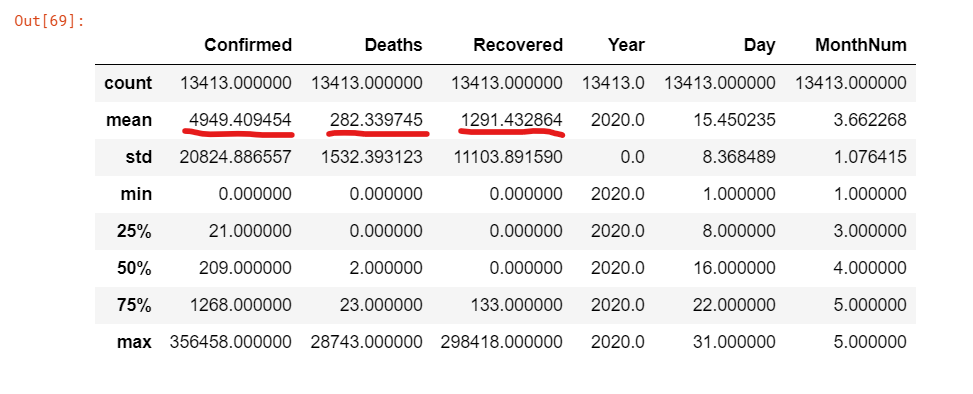

Based on the mean count for deaths, recovered and confirmed cases, we can say that
* There will be estimated 5000 confirmed cases reported per day
* 300 deaths reported per day
* 1000 recovered cases reported per day

Therefore, we will be using these estimated stats as our maximum number for reported deaths, confirmed and recovered cases in later coding.

> data1['Deaths'] = np.random.randint(0,300,size=(len(data1),1))

> data1['Recovered'] = np.random.randint(0,1000,size=(len(data1),1))

> data1['Confirmed'] = np.random.randint(0,5000,size=(len(data1),1))

In [ ]:
# Applying random_obdate function to ObservationDate column
data1['ObservationDate'] = data1['ObservationDate'].apply(random_obdate)

# Applying conversion of ObservationDate to Last Update as Timestamp
data1['Last Update'] = data1['ObservationDate'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

# Retrieve year, month and day from ObservationDate
data1['Year'] = data1['ObservationDate'].dt.year
data1['Month'] = data1['ObservationDate'].dt.month
data1['Day'] = data1['ObservationDate'].dt.day

# Map month to values in dictionary variable called months
# Extract number from month column and convert it to integer in new column called MonthNum
data1['Month'] = data1['Month'].map(months)
data1['MonthNum'] = data1['Month'].str[:2]
data1['MonthNum'] = pd.to_numeric(data1['MonthNum'])

# Applying random_country function to Country/Region column
data1['Country/Region'] = data1['Country/Region'].apply(random_country)
# Applying random_province function to Province/State column based on Country/Region column (longer loading time)
data1['Province/State'] = data1['Country/Region'].apply(random_province)

# Applying random function to generate different number of cases for death, recovered and confirmed columns
data1['Deaths'] = np.random.randint(0,300,size=(len(data1),1))
data1['Recovered'] = np.random.randint(0,1000,size=(len(data1),1))
data1['Confirmed'] = np.random.randint(0,5000,size=(len(data1),1))

In [ ]:
# Show only first five rows of data
# You should notice that Province/State is correctly assigned based on the Country/Region
# Now we can proceed to do more analysis with the dummy created data and see the possible outcome of this whole COVID-19 outbreak
data1.head()

In [ ]:
# Putting two different dataframes (data and data1) into one dataframe called result
frames = [data,data1]
result = pd.concat(frames)

# Show the entries of result dataframe
result

In [ ]:
# Sort result dataframe by ObservationDate column
# Store this sorted dataframe into the result variable
result = result.sort_values(by=['ObservationDate'])

# Show the entries of sorted result dataframe
result

In [ ]:
# Print out the total number of confirmed, recovered and deaths by September (3-4 months from now)
print('Total confirmed cases by September: ', data['Confirmed'].sum())
print('\n')
print('Total recovered cases by September: ', data['Recovered'].sum())
print('\n')
print('Total number of deaths by September: ', data['Deaths'].sum())